In [1]:
import re
import json
import string
import requests
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from collections import Counter
from janome.tokenizer import Tokenizer
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from langdetect import detect_langs
from langdetect.lang_detect_exception import LangDetectException

# 日本語フォントのパスを指定（使用するフォントに応じてパスを変更してください）
font_path = "C:\Windows\Fonts\msyh.ttc"
# フォントマネージャにフォントを登録
font_prop = fm.FontProperties(fname=font_path)

In [2]:
def read_json(file):
    # JSONファイルを読み込む
    with open(file, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # DataFrameに変換する
    df = pd.DataFrame(data)
    return df

channel = "@nktofficial"
file_path = f"data/{channel}/{channel}_comments.json"
comments = read_json(file_path)

# コメントのテキストデータを取得
comments_txt = []
video_ids = []
for c in comments['snippet'].tolist():
    comments_txt.append(c['topLevelComment']['snippet']['textOriginal'])

In [5]:
# コメントの文字数を取得
comment_lengths = [len(comment) for comment in comments_txt]

# ヒストグラムの表示
plt.hist(comment_lengths, bins=20, log=True)
plt.xlabel("コメントの文字数", fontproperties=font_prop)
plt.ylabel("出現回数", fontproperties=font_prop)
plt.title("コメントの文字数の分布", fontproperties=font_prop)
plt.savefig(f"data/{channel}/{channel}_hist.png")  # ヒストグラムを保存
plt.show()

# 統計的な指標の計算
mean_length = np.mean(comment_lengths)  # 平均
median_length = np.median(comment_lengths)  # 中央値
min_length = np.min(comment_lengths)  # 最小値
max_length = np.max(comment_lengths)  # 最大値
std_length = np.std(comment_lengths)  # 標準偏差
max_comment = max(comments_txt, key=len) # 最長のコメント

print("コメントの数：", len(comments))
print("平均文字数：", mean_length)
print("中央値文字数：", median_length)
print("最小文字数：", min_length)
print("最大文字数：", max_length)
print("標準偏差：", std_length)
print("最長のコメント：", max_comment

# 統計情報を保存
statistics = {
    "mean_length": mean_length,
    "median_length": median_length,
    "min_length": min_length,
    "max_length": max_length,
    "std_length": std_length
    "max_comment": max_comment
}
with open(f"data/{channel}/{channel}_statistics.json", "w", encoding="utf-8") as f:
    json.dump(statistics, f, ensure_ascii=False, indent=4)

SyntaxError: invalid syntax (145244218.py, line 29)

In [ ]:
# 各コメントの言語判定
def calculate_language_distribution(comments_txt):
    lang_counts = Counter()
    for comment in comments_txt:
        try:
            lang_info = detect_langs(comment)
            for info in lang_info:
                lang = info.lang
                prob = info.prob
                lang_counts[lang] += prob
        except LangDetectException:
            # エラーが発生した場合は無視して処理を続行
            pass

    # 各言語のコメント数と割合の計算
    total_comments = sum(lang_counts.values())
    lang_percentages = {lang: count / total_comments for lang, count in lang_counts.items()}
    
    """
    # 各言語のコメント数と割合の表示
    for lang, count in lang_counts.items():
        percentage = lang_percentages[lang] * 100
        print(f"言語: {lang} / コメント数: {count:.2f} / 割合: {percentage:.2f}%")
    """
    
    return lang_percentages
lang_percentages = calculate_language_distribution(comments_txt)

# 言語判定結果を保存
with open(f"data/{channel}/{channel}_language_distribution.json", "w", encoding="utf-8") as f:
    json.dump(lang_percentages, f, ensure_ascii=False, indent=4)

In [ ]:
lang_percentages = read_json(f"data/{channel}/{channel}_language_distribution.json")

# グラフを保存する場所とファイル名を指定
save_path = "path/to/save_directory"
file_name = "pie_chart.png"

# グラフを描画
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, startangle=90, 
                                  counterclock=False, autopct='%1.1f%%', pctdistance=0.85)

# ラベルの位置を外側に配置
for text in texts:
    text.set_horizontalalignment('center')
    text.set_verticalalignment('center')

# 割合の値を表示
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_horizontalalignment('center')
    autotext.set_verticalalignment('center')

# 凡例を作成し、外側に配置
legend = ax.legend(wedges, labels, title='Language', loc='center left', 
                   bbox_to_anchor=(1, 0.5), fontsize=12)

# 凡例に値を表示
for i, text in enumerate(legend.get_texts()):
    value = sizes[i]*100
    text.set_text(f'{text.get_text()} ({value:.2f}%)')

# グラフを保存
save_file_path = os.path.join(save_path, file_name)
plt.savefig(save_file_path, bbox_inches='tight')
print("グラフを保存しました:", save_file_path)

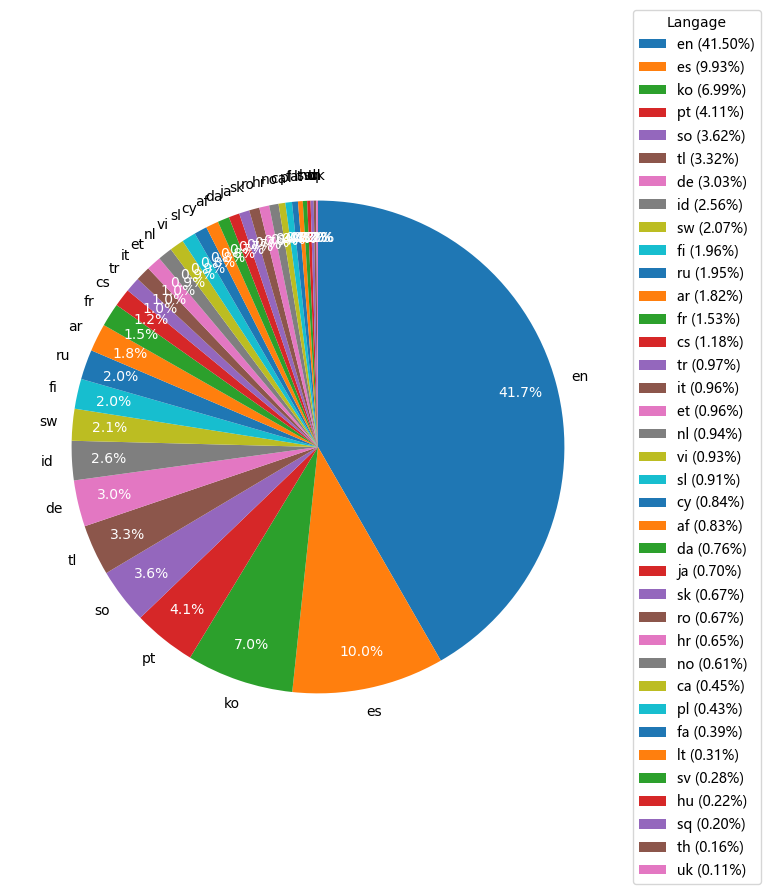

In [5]:
# ラベルと割合のデータを準備
labels = list(lang_percentages.keys())
sizes = list(lang_percentages.values())

# 割合の大きい順にソート
labels, sizes = zip(*sorted(zip(labels, sizes), key=lambda x: x[1], reverse=True))

labels_tmp = []
sizes_tmp = []
for label, size in zip(labels, sizes):
    if size >= 0.001:
        labels_tmp.append(label)
        sizes_tmp.append(size)
labels = labels_tmp
sizes = sizes_tmp

# グラフを保存する場所とファイル名を指定
save_path = "data/comments/graph"
file_name = "pie_chart.png"

# 円グラフを描画
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, startangle=90, 
                                  counterclock=False, autopct='%1.1f%%', pctdistance=0.85)

# ラベルの位置を外側に配置
for text in texts:
    text.set_horizontalalignment('center')
    text.set_verticalalignment('center')

# 割合の値を表示
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_horizontalalignment('center')
    autotext.set_verticalalignment('center')

# 凡例を作成し、外側に配置
legend = ax.legend(wedges, labels, title='Langage', loc='center left', 
                   bbox_to_anchor=(1, 0.5), fontsize=30, prop=font_prop)

# 凡例に値を表示
for i, text in enumerate(legend.get_texts()):
    value = sizes[i]*100
    text.set_text(f'{text.get_text()} ({value:.2f}%)')

# グラフを表示
plt.show()

# グラフを保存
save_file_path = os.path.join(save_path, file_name)
plt.savefig(save_file_path, bbox_inches='tight')
print("グラフを保存しました:", save_file_path)

最も頻出する単語：
you : 3481
happy : 2979
bts : 2830
anniversary : 2375
i : 2238
ユニークな単語数： 7367


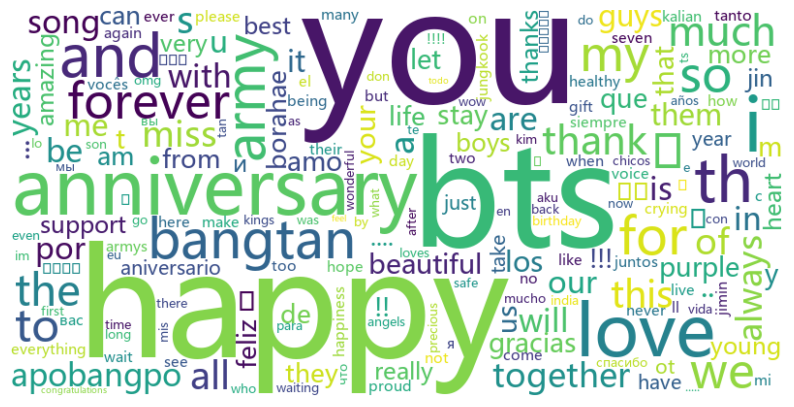

In [6]:
# 形態素解析に使用するライブラリ（Janome）のインポートと初期化
t = Tokenizer()

# ストップワードリストのURLから一般的な単語を取得
url = "http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt"
r = requests.get(url)
stopwords = r.text.split('\r\n')  + ["する", "思う", "いる", "ある", "の", "てる","れる","なる", "ん"]

# ストップワードリストに「ひろゆき」を追加
stopwords = stopwords + ["ひろゆき"]

# 形態素解析と単語の頻度カウント
tokens = []
for comment in comments_txt[:10000]:
    # テキストのクリーニング
    cleaned_text = re.sub(r"<.*?>", "", comment)
    cleaned_text = re.sub(r"http\S+|[\t\n\r\f\v]+|[\u0000-\u001f\u007f-\u009f]", "", cleaned_text)

    # 文章の正規化
    normalized_text = cleaned_text.lower()

    # 「ひろゆき」を「ひろゆき」の単語として置換
    normalized_text = re.sub(r"ひろゆき", "ひろゆき", normalized_text)

    # 形態素解析
    for token in t.tokenize(normalized_text):
        # 不要な品詞やストップワード、数字、句読点の除去
        part_of_speech = token.part_of_speech.split(',')[0]
        base_form = token.base_form
        if part_of_speech not in ['助詞', '助動詞', '記号'] and base_form not in stopwords and not base_form.isdigit() and token.base_form not in string.punctuation:
            # 単語の基本形を取得してリストに追加
            tokens.append(base_form)
            
# 単語の出現頻度を計算
word_freq = Counter(tokens)

# 上位5つの頻出単語を取得
most_common_words = word_freq.most_common(5)  
print("最も頻出する単語：")
for word, freq in most_common_words:
    print(word, ":", freq)

# ユニークな単語数
unique_word_count = len(word_freq)
print("ユニークな単語数：", unique_word_count)

# 日本語フォントを指定してWordCloudオブジェクトを作成
wordcloud = WordCloud(width=800, height=400, background_color="white", font_path=font_path).generate_from_frequencies(word_freq)

# タグクラウドを描画
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
import json
file_name = "@nktofficial_comments"
# 結合するJSONファイルのパス
file_paths = [f"data/comments/{file_name}.json", f"data/comments/{file_name}1.json"]

# 空のセットを作成して、各JSONファイルの内容を読み込み、セットに追加する
merged_data_set = set()
for file_path in file_paths:
    with open(file_path, "r", encoding="utf-8") as file:
        data = json.load(file)
        merged_data_set.update(data)
        print(len(data))

# セットからリストに変換
merged_data = list(merged_data_set)

# 結合したデータを新しいJSONファイルに保存
merged_file_path = f"data/comments/{file_name}_comments_merged.json"
with open(merged_file_path, "w", encoding="utf-8") as file:
    json.dump(merged_data, file, ensure_ascii=False)
print(len(merged_data))